In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

import sklearn.discriminant_analysis as DA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR

import matplotlib.pyplot as plt

In [2]:
from fonctions_tests import add_manager_win_percentage, add_club_win_percentage_with_referee, add_club_scores, add_price_players

data = pd.read_csv("./data/matchs_2013_2022.csv")

add_manager_win_percentage(data)
add_club_win_percentage_with_referee(data)

# je crois que les 2 sont globalement la meme chose mais au pire on pourra dire que osef et on en retirera une apres
add_club_scores(data)
add_price_players(data)

print(data.columns)
data.head()

c:\Users\lorra\OneDrive - De Vinci\A3\S6\Analyse de donnée\Projet\fonctions_tests.py:63: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  lineups = pd.read_csv("data\game_lineups.csv", sep=",")


Index(['Unnamed: 0', 'game_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'results',
       'home_club_manager_win_percentage', 'away_club_manager_win_percentage',
       'home_club_win_percentage_with_referee',
       'away_club_win_percentage_with_referee', 'score_away_team',
       'score_home_team', 'transfer_home_team'],
      dtype='object')
Index(['Unnamed: 0', 'game_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', '

,Unnamed: 0,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,competition_type,results,home_club_manager_win_percentage,away_club_manager_win_percentage,home_club_win_percentage_with_referee,away_club_win_percentage_with_referee,score_away_team,score_home_team,transfer_home_team,transfer_away_team
0,12,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,...,domestic_league,0,0.571429,0.166667,0.217391,0.333333,81.567038,188.724000,12850.0,480.0
1,13,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,...,domestic_league,-1,0.393939,0.254237,0.428571,0.200000,74.769105,31.855883,0.0,3700.0
2,14,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,...,domestic_league,-1,0.214286,0.276923,0.200000,0.500000,244.679289,23.689626,2520.0,3650.0
3,15,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,...,domestic_league,0,0.313433,0.178218,0.461538,0.200000,31.855883,371.824554,62100.0,0.0
4,16,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,...,domestic_league,1,0.166667,0.338235,0.500000,0.387097,371.824554,57.169593,0.0,62100.0


In [3]:
X = data[["attendance", "home_club_manager_win_percentage", "away_club_manager_win_percentage", "home_club_win_percentage_with_referee", "away_club_win_percentage_with_referee", "score_away_team", "score_home_team", "transfer_home_team", "transfer_away_team"]] # 
y = data[["results"]]
X.head()

,attendance,home_club_manager_win_percentage,away_club_manager_win_percentage,home_club_win_percentage_with_referee,away_club_win_percentage_with_referee,score_away_team,score_home_team,transfer_home_team,transfer_away_team
0,31952.0,0.571429,0.166667,0.217391,0.333333,81.567038,188.724000,12850.0,480.0
1,8620.0,0.393939,0.254237,0.428571,0.200000,74.769105,31.855883,0.0,3700.0
2,14874.0,0.214286,0.276923,0.200000,0.500000,244.679289,23.689626,2520.0,3650.0
3,13391.0,0.313433,0.178218,0.461538,0.200000,31.855883,371.824554,62100.0,0.0
4,5981.0,0.166667,0.338235,0.500000,0.387097,371.824554,57.169593,0.0,62100.0


In [4]:
X.describe()

,attendance,home_club_manager_win_percentage,away_club_manager_win_percentage,home_club_win_percentage_with_referee,away_club_win_percentage_with_referee,score_away_team,score_home_team,transfer_home_team,transfer_away_team
count,3741.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000
mean,21444.918204,0.441883,0.294998,0.377803,0.359078,230.843606,231.051570,28529.259441,28471.844041
std,13117.601011,0.148483,0.139919,0.218201,0.211092,175.830965,176.045400,52439.289851,52326.496043
min,500.000000,0.000000,0.000000,0.000000,0.000000,18.911152,18.911152,0.000000,0.000000
25%,12125.000000,0.345455,0.200000,0.235294,0.222222,112.783735,112.783735,3650.000000,3650.000000
50%,16782.000000,0.423077,0.276923,0.375000,0.333333,176.483410,176.483410,12850.000000,12850.000000
75%,28324.000000,0.558824,0.400000,0.500000,0.500000,308.167983,308.167983,30200.000000,30200.000000
max,70785.000000,1.000000,0.684211,1.000000,1.000000,801.536097,801.536097,247000.000000,247000.000000


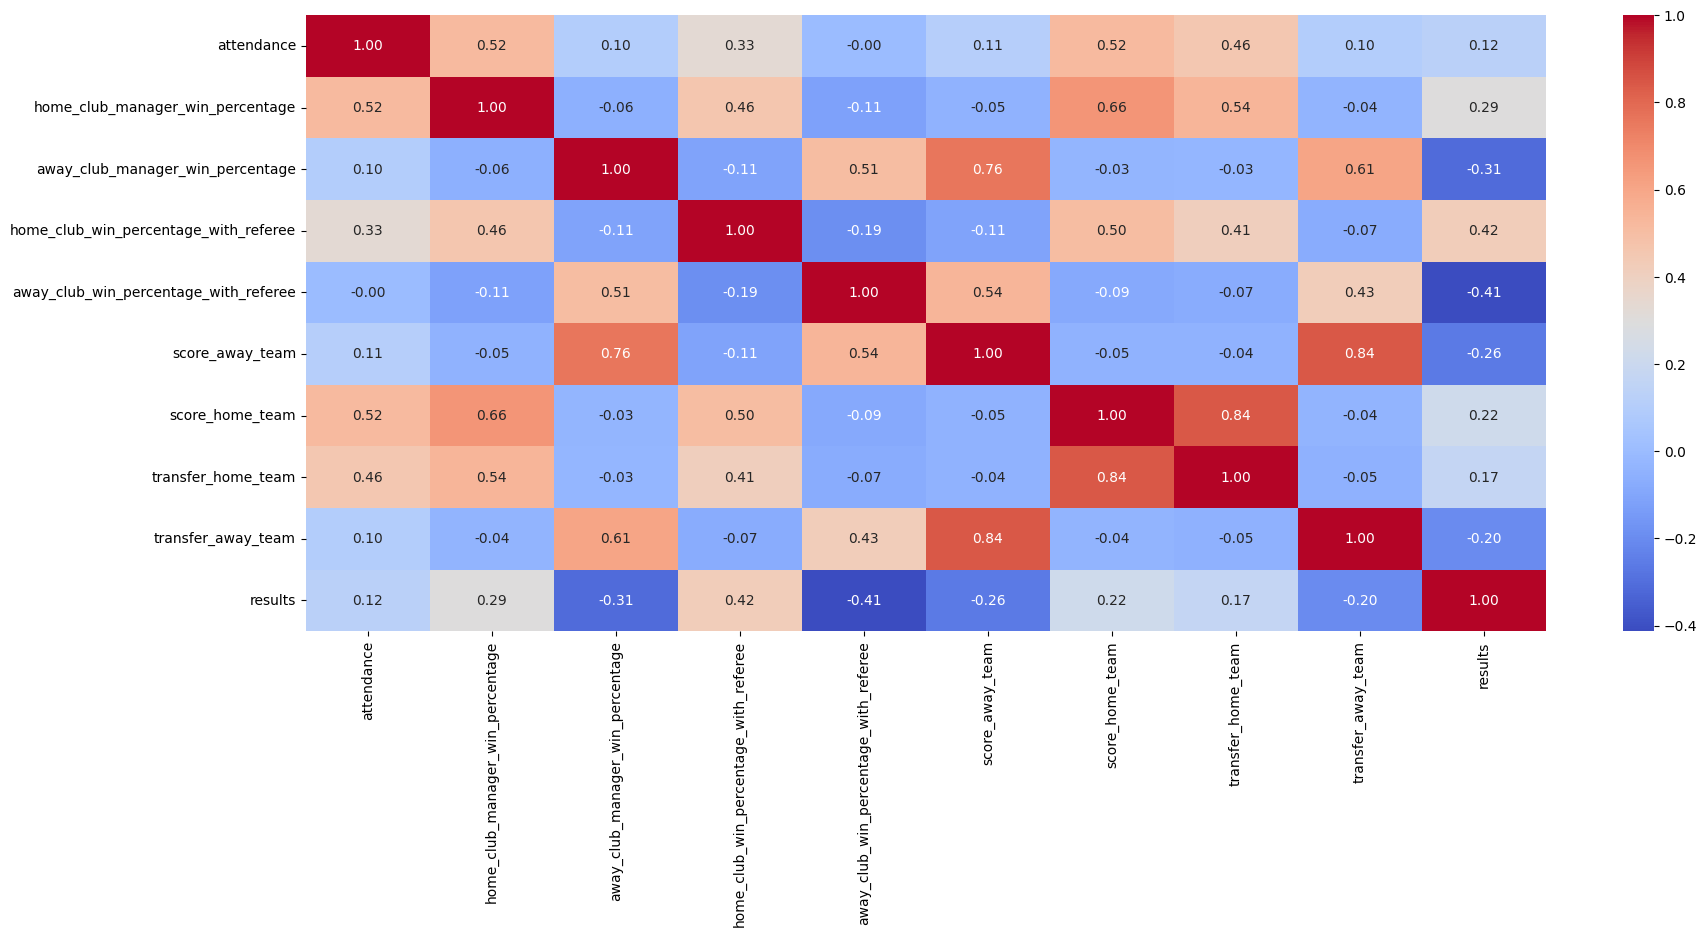

In [5]:
import seaborn as sns

def plot_correlation_matrix(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()

corr_mat = pd.DataFrame(X)
corr_mat['results'] = y
plot_correlation_matrix(corr_mat)

In [6]:
X = SimpleImputer(strategy='mean').fit_transform(X)

In [7]:
from fonctions_tests import test_data
import sklearn.discriminant_analysis as DA

accuracy = test_data(X, y, model=DA.LinearDiscriminantAnalysis())

print("Accuracy with Linear Discriminant Analysis : ", accuracy)

Accuracy with Linear Discriminant Analysis :  0.6102941176470589


## Calcul des scores de précision de différents modèles

In [9]:
# Define the names of the classifications method
names = ["LogisticRegression",
         "NBayes",
         "LDA",
         "QDA",
         "KNN",
         "SVM linear",
         "SVM rbf",
         "SVM sigmoid",
         "RandomForest",
         "DecisionTree"]

# Define the classifiers
classifiers = [LogisticRegression(C=1e5),
               GaussianNB(),
               DA.LinearDiscriminantAnalysis(),
               DA.QuadraticDiscriminantAnalysis(),
               KNeighborsClassifier(n_neighbors=5),
               SVC(kernel='linear', C=1.0),
               SVC(kernel='rbf', gamma = 1e-4),
               SVC(kernel='sigmoid', gamma = 1e-4),
               RandomForestClassifier(),
               DecisionTreeClassifier()]

# Ignore warnings
from warnings import simplefilter
simplefilter(action='ignore')

# Loop through all different classfication methods
for name, clf in zip(names, classifiers):

    accuracy = test_data(X, y, model=clf)

    print("Accuracy with ", name, " : ", round(accuracy,3))

Accuracy with  LogisticRegression  :  0.615
Accuracy with  NBayes  :  0.555
Accuracy with  LDA  :  0.61
Accuracy with  QDA  :  0.583
Accuracy with  KNN  :  0.527
Accuracy with  SVM linear  :  0.62
Accuracy with  SVM rbf  :  0.488
Accuracy with  SVM sigmoid  :  0.46
Accuracy with  RandomForest  :  0.578
Accuracy with  DecisionTree  :  0.502
